# EXPLORACIÓN DE LOS DATOS

<code> Proyecto NOVELLA </code>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/maria/Dropbox/UCM/PD1/pruebas-proyecto/LIBROS_FINAL.csv")

In [4]:
df = df.iloc[:, 3:]

In [5]:
df.shape

(4113, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4113 non-null   object 
 1   Weeks on List   4113 non-null   float64
 2   potencialBS     4113 non-null   int64  
 3   Rating          4113 non-null   float64
 4   NumPages        4113 non-null   int64  
 5   GenresList      4113 non-null   object 
 6   Type            4113 non-null   object 
 7   DatePublished   4113 non-null   object 
 8   SagaNumber      4113 non-null   int64  
 9   RedPerc         4113 non-null   float64
 10  BluePerc        4113 non-null   float64
 11  GreenPerc       4113 non-null   float64
 12  DaysDifference  4113 non-null   int64  
 13  BelongSaga      4113 non-null   bool   
 14  Price           4113 non-null   float64
 15  WordsTitle      4113 non-null   int64  
 16  PriceFormat     4113 non-null   object 
 17  BookInterest1M  4113 non-null   f

In [7]:
df.describe()

,Weeks on List,potencialBS,Rating,NumPages,SagaNumber,RedPerc,BluePerc,GreenPerc,DaysDifference,Price,WordsTitle,BookInterest1M
count,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000,4113.000000
mean,1.382689,0.147338,3.916010,363.553854,2.364211,0.476032,0.422101,0.437243,513.390226,18.389633,3.248480,23.013129
std,9.466555,0.354485,0.318862,124.316787,5.334721,0.231209,0.206014,0.200325,2778.175297,5.634474,1.576985,184.551779
min,0.000000,0.000000,2.520000,11.000000,0.000000,0.010000,0.010000,0.030000,20.000000,0.990000,1.000000,0.000000
25%,0.000000,0.000000,3.710000,305.000000,1.000000,0.280000,0.250000,0.270000,20.000000,15.170000,2.000000,0.000000
50%,0.000000,0.000000,3.930000,352.000000,1.000000,0.450000,0.390000,0.420000,20.000000,17.790000,3.000000,0.000000
75%,0.000000,0.000000,4.140000,400.000000,1.000000,0.660000,0.570000,0.590000,20.000000,21.090000,4.000000,0.000000
max,212.000000,1.000000,4.810000,2895.000000,60.000000,0.990000,0.940000,0.950000,65332.000000,68.490000,14.000000,2711.000000


### Ratios

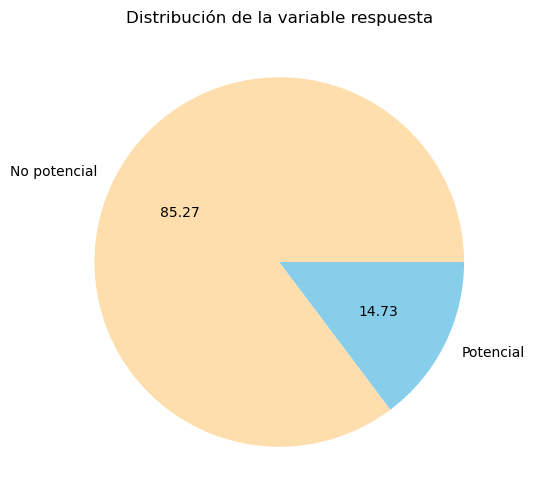

In [8]:
plt.figure(figsize=(6, 6))

counts = df["potencialBS"].value_counts()
plt.pie(counts, labels=["No potencial", "Potencial"], colors = ["NavajoWhite", "SkyBlue"],autopct='%1.2f')
plt.title('Distribución de la variable respuesta')
plt.show()

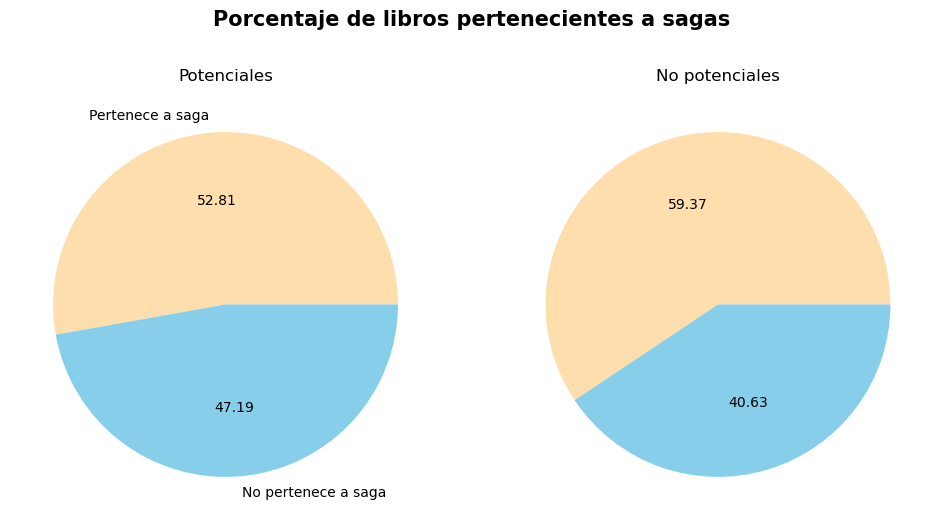

In [9]:
etiquetasSaga = ['Pertenece a saga', 'No pertenece a saga']

potencialSaga = df[df['potencialBS'] == 1]['BelongSaga'].value_counts()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(potencialSaga, labels=etiquetasSaga, autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('Potenciales')

noPotencialSaga = df[df['potencialBS'] == 0]['BelongSaga'].value_counts()

plt.subplot(1, 2, 2)
plt.pie(noPotencialSaga , autopct='%1.2f', colors = ["NavajoWhite", "SkyBlue"])
plt.title('No potenciales')

plt.suptitle("Porcentaje de libros pertenecientes a sagas", y=1.05, fontsize=15, fontweight="bold")
plt.tight_layout()
plt.show()

### Géneros más presentes

In [10]:
# Dividimos la columna GenresList en listas de géneros
df['GenresList'] = df['GenresList'].apply(lambda x: x.strip('[]').replace("'", "").split(", "))

In [11]:
# Contamos el número de géneros distintos
generosDistintos = set()
for row in df['GenresList']:
    generosDistintos.update(row)

totalGeneros = len(generosDistintos)
print("Número de géneros distintos:", totalGeneros)

Número de géneros distintos: 334


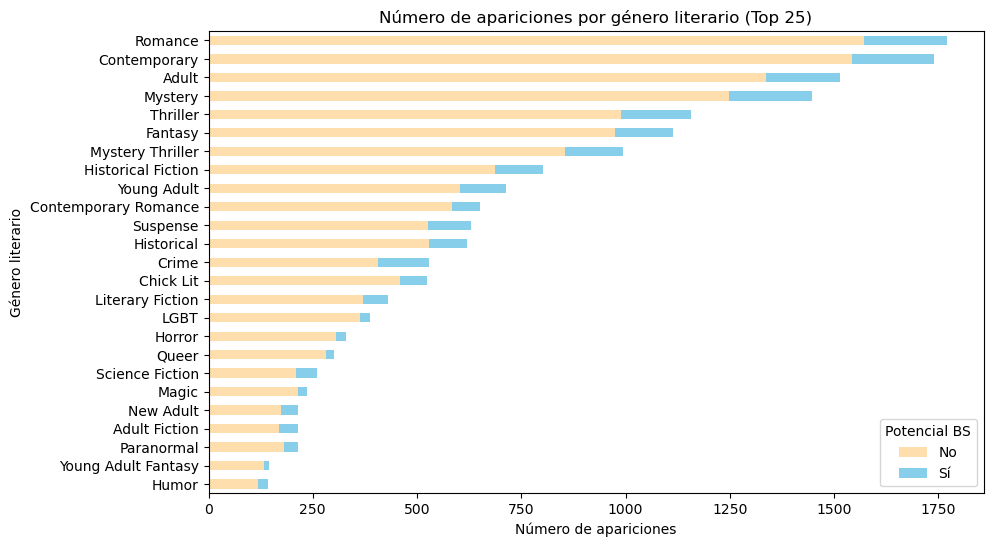

In [12]:
# Contamos las ocurrencias de cada género para cada valor de PotencialBS
generosPorPotencial = df.apply(lambda row: pd.Series(row['GenresList']), axis=1).stack().reset_index(level=1, drop=True)
generosPorPotencial.name = 'Genre'
generosPorPotencial = df.drop('GenresList', axis=1).join(generosPorPotencial)
generosPorPotencial= generosPorPotencial.groupby(['potencialBS', 'Genre']).size().unstack(fill_value=0)

# Seleccionamos los 15 primeros géneros (excluyendo "fiction" y "audiobook")
topGeneros = generosPorPotencial.sum().nlargest(27)[2:]

# Filtramos los géneros y reordenamos las columnas
generosPorPotencial = generosPorPotencial[topGeneros.index]

# Creamos el gráfico de barras apiladas
generosPorPotencial = generosPorPotencial.transpose()
generosPorPotencial.plot(kind='barh', stacked=True, figsize=(10, 6), color = ["NavajoWhite", "SkyBlue"])
plt.legend(title='Potencial BS', labels=['No', 'Sí'])
plt.title('Número de apariciones por género literario (Top 25)')
plt.xlabel('Número de apariciones')
plt.ylabel('Género literario')
plt.gca().invert_yaxis()
plt.show()

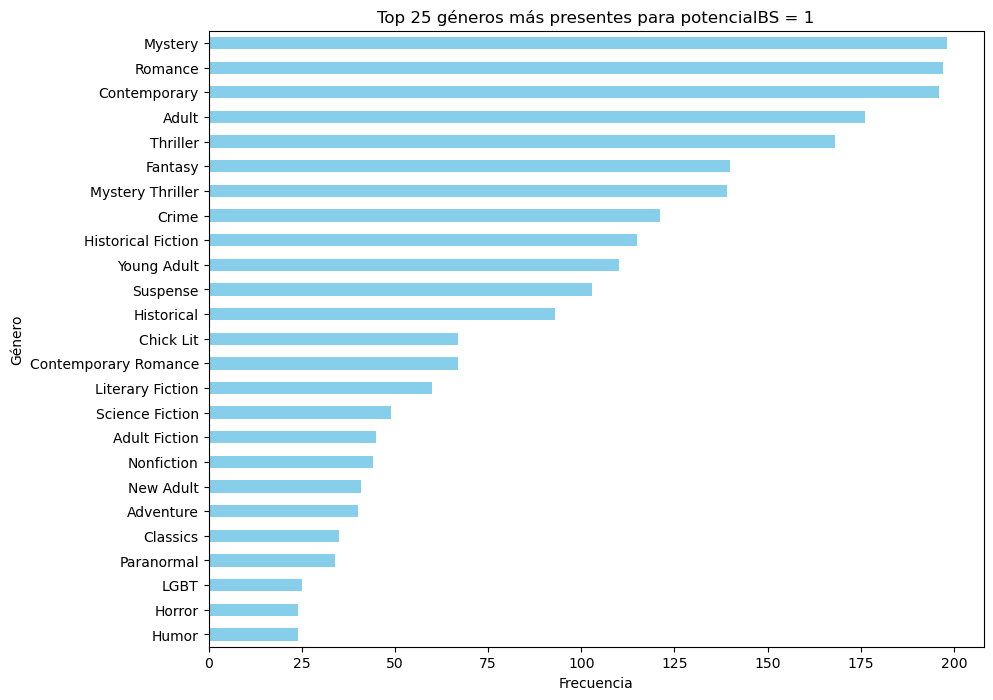

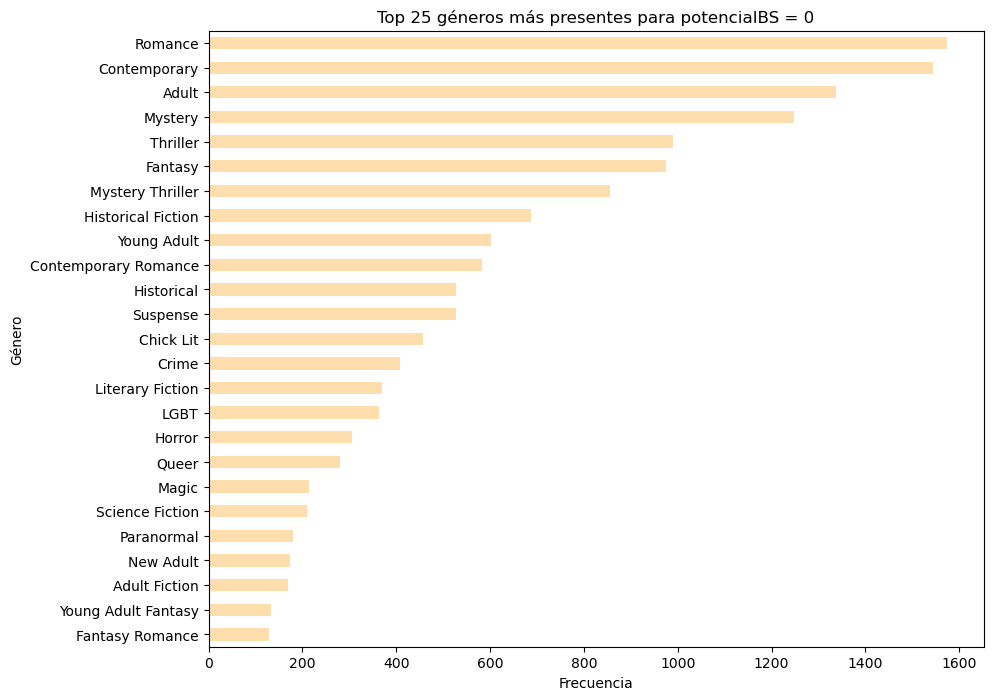

In [13]:
df_potential_1 = df[df['potencialBS'] == 1]
df_potential_0 = df[df['potencialBS'] == 0]

# Contamos la frecuencia de cada género para potencialBS = 1
generosPotencial = pd.Series([genre for sublist in df_potential_1['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Contamos la frecuencia de cada género para potencialBS = 0
genre_counts_0 = pd.Series([genre for sublist in df_potential_0['GenresList'] for genre in sublist]).value_counts()[2:].head(25)

# Gráfico para potencialBS = 1
plt.figure(figsize=(10, 8))
generosPotencial.plot(kind='barh', color="SkyBlue")
plt.title('Top 25 géneros más presentes para potencialBS = 1')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

# Gráfico para potencialBS = 0
plt.figure(figsize=(10, 8))
genre_counts_0.plot(kind='barh', color="NavajoWhite" )
plt.title('Top 25 géneros más presentes para potencialBS = 0')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.gca().invert_yaxis()
plt.show()

### Diagramas de cajas y bigotes

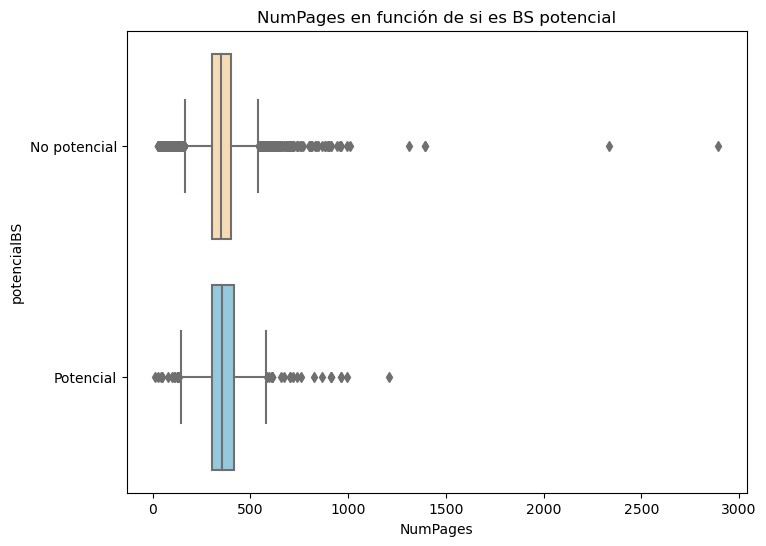

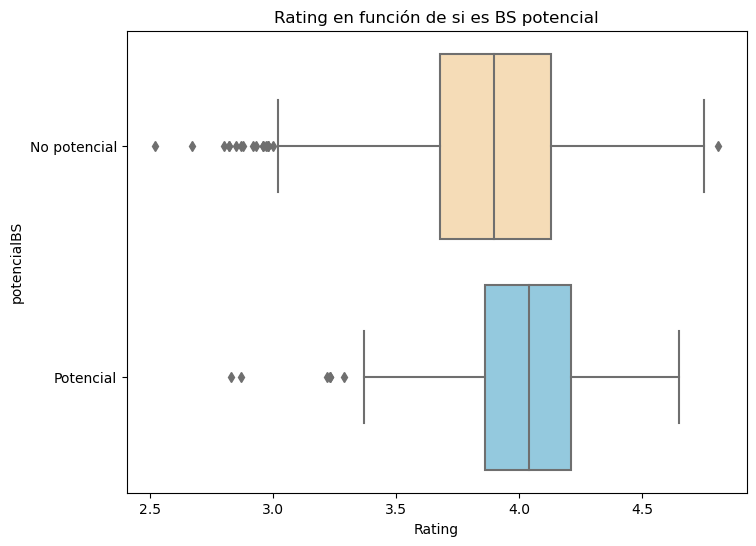

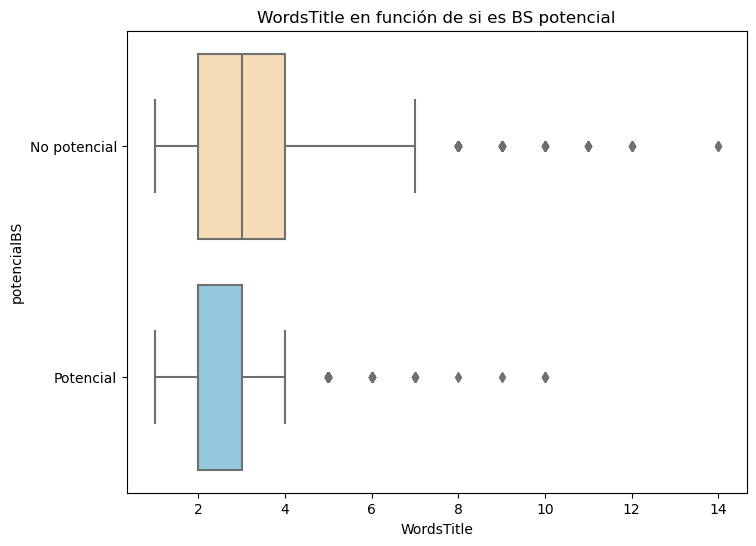

In [13]:
# Lista de variables 
variables = ['NumPages', 'Rating', 'WordsTitle']

colors = ["NavajoWhite", "SkyBlue"]

for variable in variables:
    plt.figure(figsize=(8, 6))
    ax = sns.boxplot(y='potencialBS', x=variable, data=df, orient='h', palette = colors)
    plt.title(f'{variable} en función de si es BS potencial')
    plt.ylabel('potencialBS')
    plt.xlabel(variable)
    
    ax.set_yticklabels(['No potencial', 'Potencial'])
    
    plt.show()

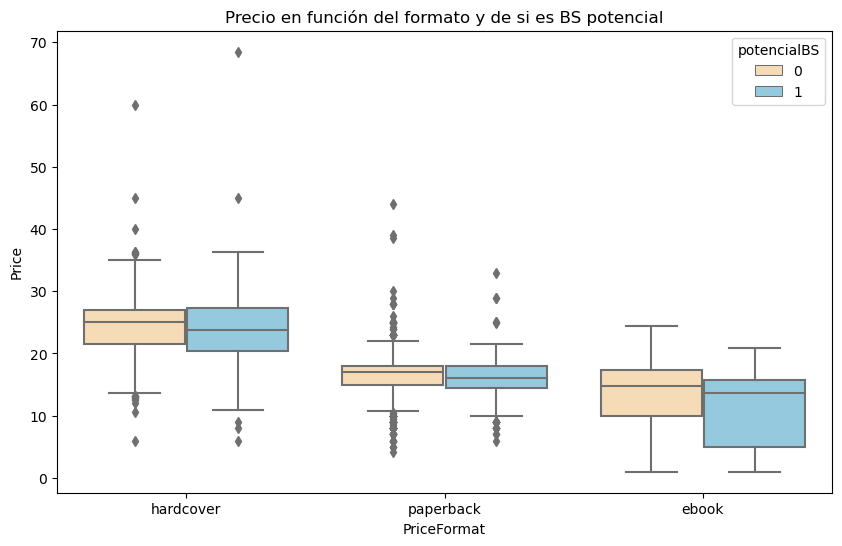

In [14]:
# Ajusta el tamaño de la figura si es necesario
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(x='PriceFormat', y='Price', hue='potencialBS', data=df, palette = colors)

# Añadir título y etiquetas a los ejes
plt.title('Precio en función del formato y de si es BS potencial')
plt.xlabel('PriceFormat')
plt.ylabel('Price')

# Mostrar el gráfico
plt.show()

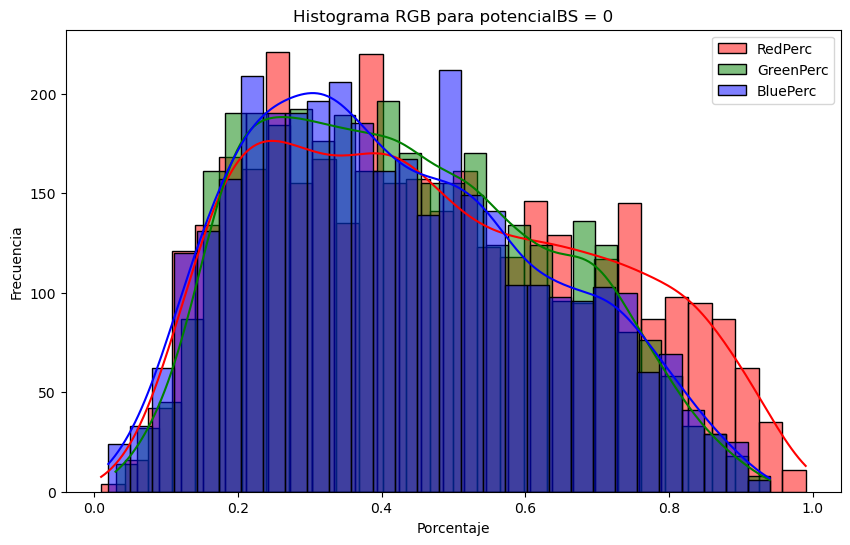

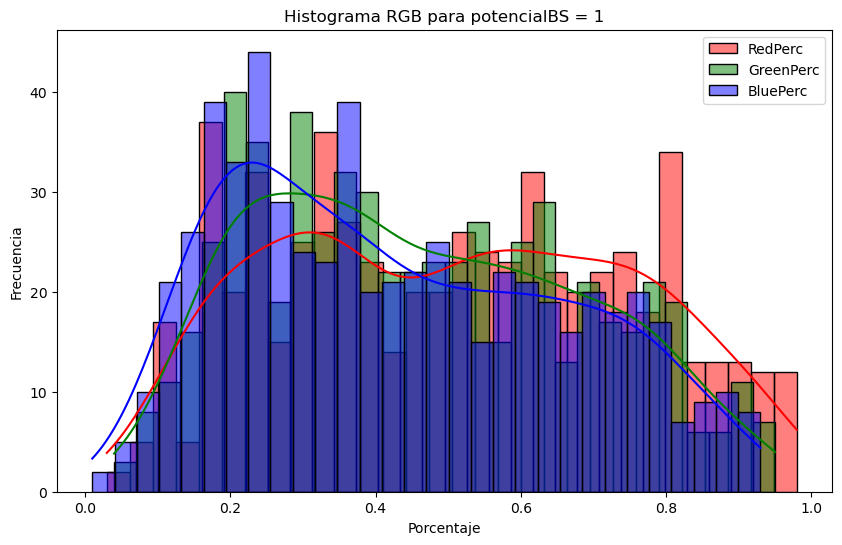

In [15]:
for i in range(0, 2):
    df1 = df[df["potencialBS"] == i]
    
    # Ajusta el tamaño de la figura si es necesario
    plt.figure(figsize=(10, 6))

    # Histograma para RedPerc
    sns.histplot(df1['RedPerc'], color='red', bins=30, kde=True, alpha=0.5, label='RedPerc')

    # Histograma para GreenPerc
    sns.histplot(df1['GreenPerc'], color='green', bins=30, kde=True, alpha=0.5, label='GreenPerc')

    # Histograma para BluePerc
    sns.histplot(df1['BluePerc'], color='blue', bins=30, kde=True, alpha=0.5, label='BluePerc')

    # Añadir leyenda
    plt.legend()

    # Añadir título y etiquetas a los ejes
    plt.title(f'Histograma RGB para potencialBS = {i}')
    plt.xlabel('Porcentaje')
    plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

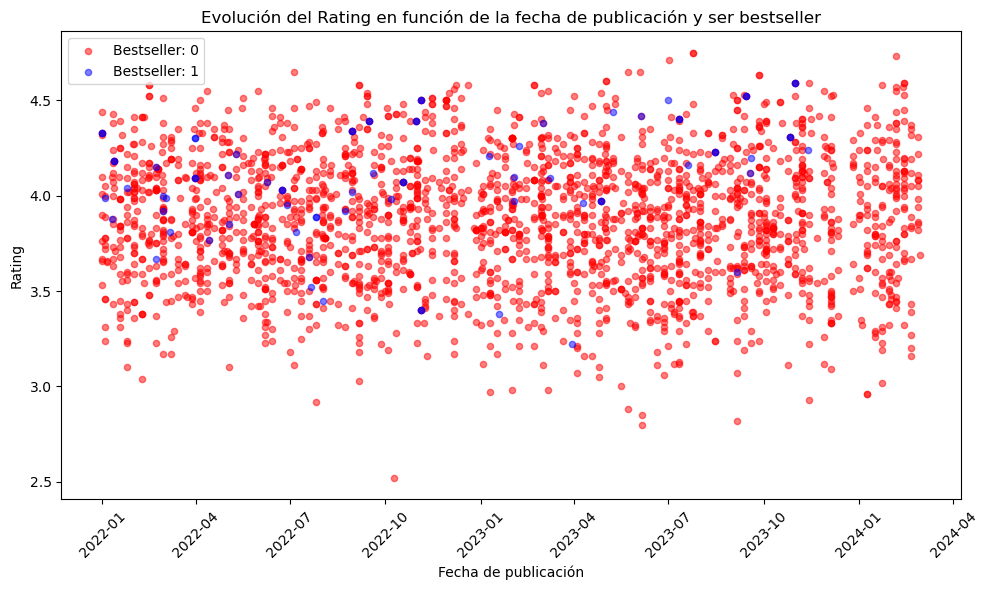

In [16]:

variable = 'Rating'
# Convertir la columna 'DatePublished' a formato de fecha
df['DatePublished'] = pd.to_datetime(df['DatePublished'])

# Filtrar solo los libros a partir de 2018
df2 = df[df['DatePublished'].dt.year >= 2022]

# Ordenar el DataFrame por la columna 'DatePublished'
df2 = df2.sort_values(by='DatePublished')

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
colors = {True: 'blue', False: 'red'}
for bs, group in df2.groupby('potencialBS'):
    plt.scatter(group['DatePublished'], group[variable], s=20, alpha=0.5, color=colors[bs], label=f'Bestseller: {bs}', marker='o')
plt.xlabel('Fecha de publicación')
plt.ylabel(variable)
plt.title(f'Evolución del {variable} en función de la fecha de publicación y ser bestseller')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlaciones

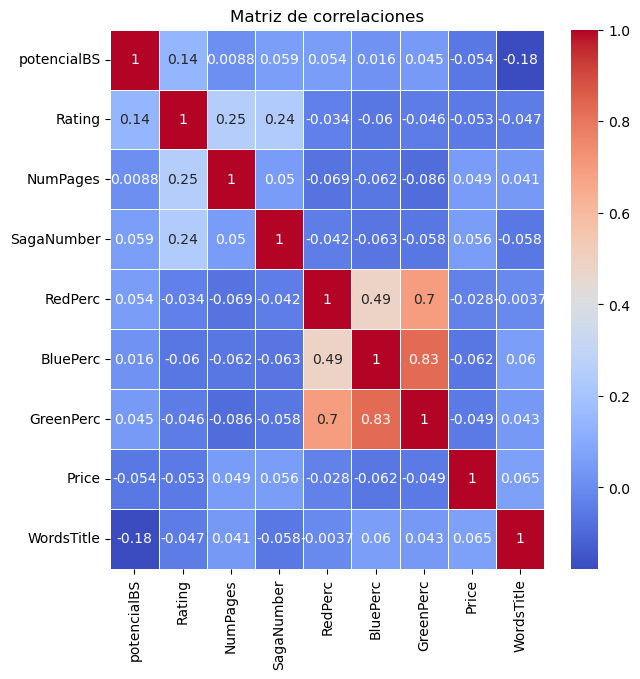

In [17]:
variablesCorrelacion = ["potencialBS", "Rating", "NumPages", "SagaNumber", "RedPerc", "BluePerc", "GreenPerc", "Price", "WordsTitle"]

# Calcula la matriz de correlación
correlation_matrix = df[variablesCorrelacion].corr()

# Crea el mapa de calor (heatmap) usando seaborn
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlaciones')
plt.show()

### Análisis de las variables frente a la variable objetivo

In [19]:
df.head()

,Date,Weeks on List,potencialBS,Rating,NumPages,GenresList,Type,DatePublished,SagaNumber,RedPerc,BluePerc,GreenPerc,DaysDifference,BelongSaga,Price,WordsTitle,PriceFormat,BookInterest1M
0,2019-02-17,1.0,1,4.14,355,"[Crime, Mystery Thriller, Suspense, Mystery, F...",hardcover,2010-05-07,9,0.93,0.07,0.54,3208,True,23.96,1,hardcover,192.0
1,2019-02-17,16.0,1,4.24,393,"[Historical Fiction, Fantasy, Fiction, Retelli...",hardcover,2018-04-10,1,0.38,0.13,0.24,313,False,19.59,1,hardcover,1430.0
2,2019-02-17,2.0,1,3.60,143,"[Read For School, Historical Fiction, School, ...",paperback,1946-05-01,1,0.32,0.36,0.27,26590,False,8.00,1,hardcover,1373.0
3,2019-02-17,193.0,1,4.39,384,"[Historical Fiction, Romance, Mystery, Fiction...",ebook,2018-08-14,1,0.74,0.46,0.55,187,False,14.99,4,paperback,279.0
4,2019-02-17,4.0,1,4.58,456,"[Poetry, Nonfiction, Nature, Classics, Queer, ...",hardcover,2017-10-10,1,0.91,0.91,0.91,495,False,21.00,1,hardcover,100.0


In [20]:
varCat = ['GenresList', 'Type']

filtroBS = df['potencialBS'] == 1

df_bs = df[filtroBS]
df_nbs = df[~filtroBS]

Vamos a estudiar los valores de la media, mediana y desviación típica de las variables en función de si el libro al que pertenecen es bestseller o no.

In [33]:
df_bs.describe().iloc[1:, :].T

,mean,std,min,25%,50%,75%,max
Weeks on List,9.384488,23.105701,1.00,1.0000,3.00,6.00,212.00
potencialBS,1.000000,0.000000,1.00,1.0000,1.00,1.00,1.00
Rating,4.025083,0.267895,2.83,3.8600,4.04,4.21,4.65
NumPages,366.179868,127.030076,11.00,304.0000,356.50,416.00,1207.00
SagaNumber,3.127063,6.136628,1.00,1.0000,1.00,2.00,55.00
RedPerc,0.506238,0.240670,0.03,0.3025,0.51,0.71,0.98
BluePerc,0.430099,0.225908,0.01,0.2300,0.39,0.61,0.93
GreenPerc,0.458795,0.219419,0.04,0.2725,0.43,0.63,0.95
DaysDifference,3368.702970,6548.376959,20.00,152.0000,1156.50,3669.25,65332.00
Price,17.652096,5.972604,0.99,14.9900,16.99,19.99,68.49


In [34]:
df_nbs.describe().iloc[1:, :].T

,mean,std,min,25%,50%,75%,max
Weeks on List,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
potencialBS,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Rating,3.897163,0.323188,2.52,3.68,3.90,4.13,4.81
NumPages,363.100086,123.854717,26.00,306.00,352.00,400.00,2895.00
SagaNumber,2.232392,5.173201,0.00,1.00,1.00,1.00,60.00
RedPerc,0.470813,0.229167,0.01,0.28,0.44,0.66,0.99
BluePerc,0.420719,0.202381,0.02,0.26,0.39,0.57,0.94
GreenPerc,0.433519,0.196633,0.03,0.27,0.42,0.58,0.94
DaysDifference,20.000000,0.000000,20.00,20.00,20.00,20.00,20.00
Price,18.517077,5.564964,0.99,15.30,17.99,21.80,59.95


Observaciones:
- la media del rating, número de páginas y número de saga es ligeramente mayor en los bestseller
- los bestsellers en media tienen títulos más cortos
- hay mucho más interés en búsquedas online en los bestseller

### Análisis variables categóricas

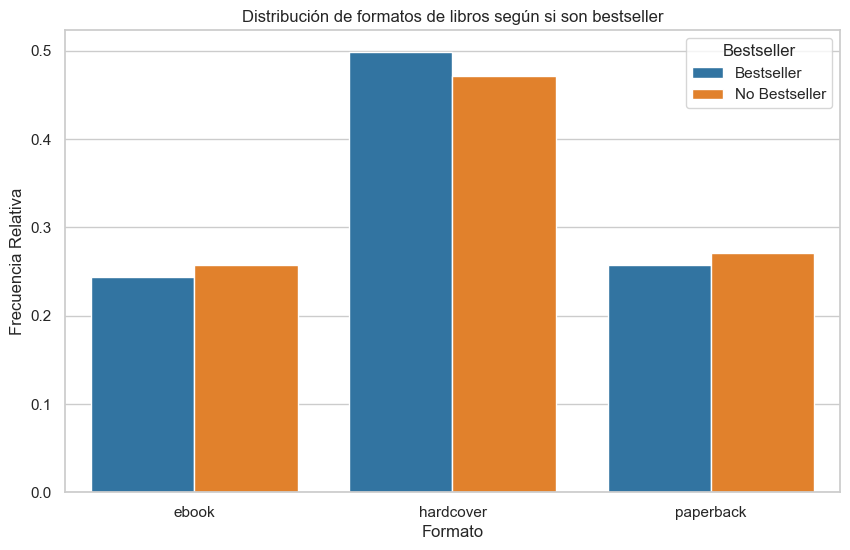

In [56]:
# Calculamos las frecuencias relativas
rf_bs = df_bs.groupby('Type').size() / len(df_bs)
rf_nbs = df_nbs.groupby('Type').size() / len(df_nbs)

# Juntamos las gráficas y reseteamos el índice
relative_frequencies = pd.concat([rf_bs, rf_nbs], axis=1)
relative_frequencies.reset_index(inplace=True)

relative_frequencies.columns = ['Tipo', 'Bestseller', 'No Bestseller']
relative_frequencies_melted = relative_frequencies.melt(id_vars='Tipo', var_name='Bestseller', value_name='Frecuencia Relativa')

sns.set(style="whitegrid")

# Dibujamos el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=relative_frequencies_melted, x='Tipo', y='Frecuencia Relativa', hue='Bestseller', palette="tab10")

plt.title("Distribución de formatos de libros según si son bestseller")
plt.xlabel("Formato")
plt.ylabel("Frecuencia Relativa")

plt.show()


Podemos observar que la distribución de los formatos es prácticamente igual en los libros bestsellers que los que no lo son.